In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
#Anaylsis of data set

In [4]:
#Check null values
diabetes_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
#Drop duplicate rows of the dataset
diabetes_data.drop_duplicates(inplace=True)
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
#Label encoding for gender
encoder = preprocessing.LabelEncoder()
diabetes_data['gender'] = encoder.fit_transform(diabetes_data['gender'])
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [7]:
#Convert data type of age column to int
diabetes_data['age'] = diabetes_data['age'].astype('int')
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,never,25.19,6.6,140,0
1,0,54,0,0,No Info,27.32,6.6,80,0
2,1,28,0,0,never,27.32,5.7,158,0
3,0,36,0,0,current,23.45,5.0,155,0
4,1,76,1,1,current,20.14,4.8,155,0


In [8]:
# Convert smoking history to numerical format
#In here no info is conerted into -1, if the individual has done smoking in current, ever or former they are converted into 1 
# if the individual is not smoking it is converted into 1
smoking_history_numerical = {'never': 0, 'No Info': -1, 'current': 1, 'former': 1, 'ever': 1, 'not current': 0}
diabetes_data['smoking_history'] = diabetes_data['smoking_history'].map(smoking_history_numerical)

In [9]:
diabetes_data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.783756,0.077601,0.040803,-0.108096,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.482208,0.267544,0.197833,0.751219,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.000000,0.000000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,-1.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


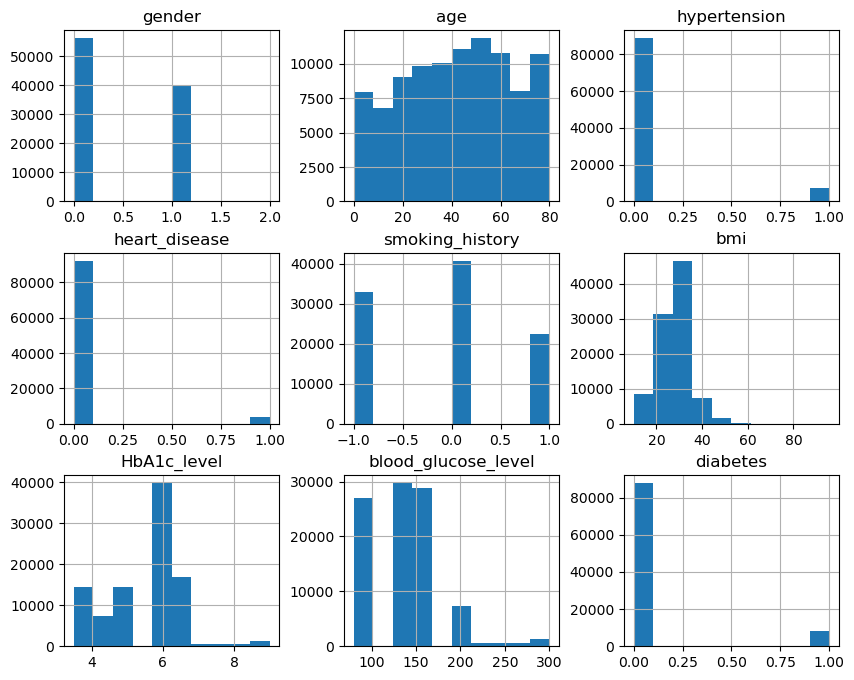

In [10]:
diabetes_data.hist(bins=10, figsize=(10,8))
plt.show()

In [11]:
#Data Visualization

In [12]:
#Categorical data visualization
#gender, hyper_tension, heart_disease, smoking_history

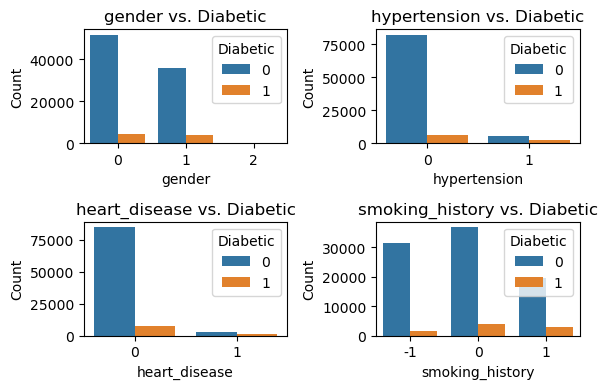

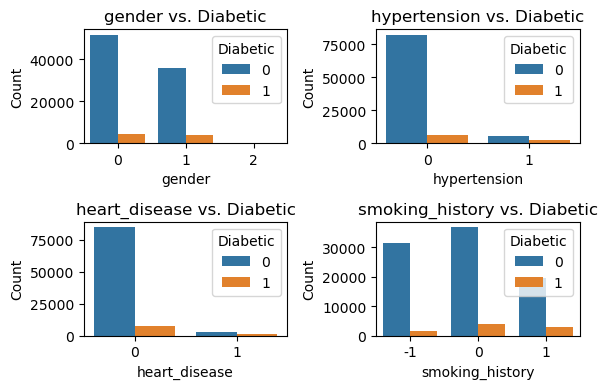

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the number of variables to plot in each figure
variables_per_figure = 4

for i in range(0, len(diabetes_data.columns[:-1]), variables_per_figure):
    columns_subset = diabetes_data[['gender','hypertension','heart_disease','smoking_history']]
    
    # Create a new figure
    plt.figure(figsize=(6, 4))
    
    # Iterate through selected variables and create subplots
    for j, column in enumerate(columns_subset):
        plt.subplot(2, 2, j+1)
        
        sns.countplot(x=column, hue='diabetes', data=diabetes_data)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} vs. Diabetic')
        plt.legend(title='Diabetic', loc='upper right')

    # Adjust the spacing of subplot 
    plt.tight_layout()

    # Show the figure
    plt.show()

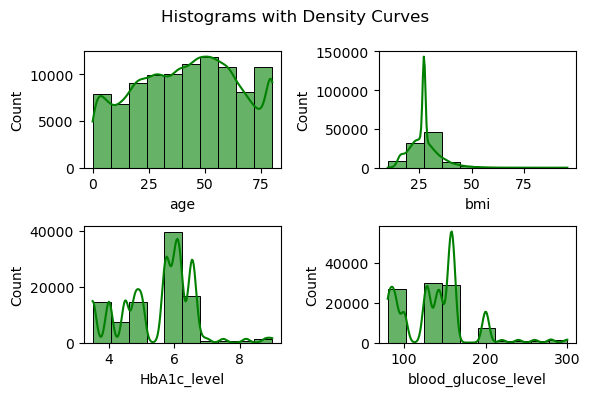

In [14]:
#Continuous data visualization
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (6,4))

con_cols=['age', 'bmi', 'HbA1c_level','blood_glucose_level']
for i, ax in enumerate(axes.flatten()):
    sns.histplot(diabetes_data[con_cols[i]], bins = 10, kde = True, ax = ax, color = "green", edgecolor = 'k', linewidth = 0.7, alpha = 0.6)
fig.suptitle("Histograms with Density Curves")
plt.tight_layout()
plt.show()

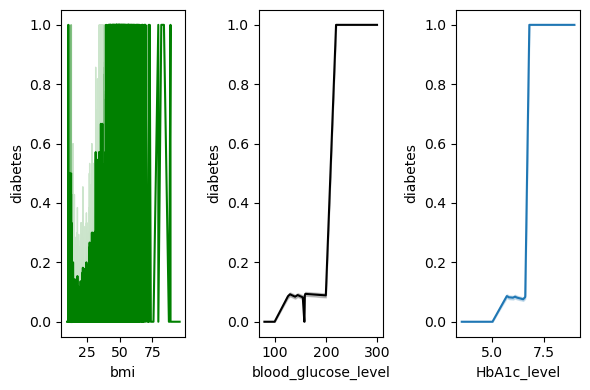

In [15]:
fig = plt.figure(figsize = (6, 4))


plt.subplot(1,3,1)
sns.lineplot(x = diabetes_data['bmi'], y =  diabetes_data['diabetes'] , color = 'green' )

plt.subplot(1,3,2)
sns.lineplot(x = diabetes_data['blood_glucose_level'], y =  diabetes_data['diabetes'] , color = 'black' )


plt.subplot(1,3,3)
sns.lineplot(x = diabetes_data['HbA1c_level'], y =  diabetes_data['diabetes'] )

plt.tight_layout()

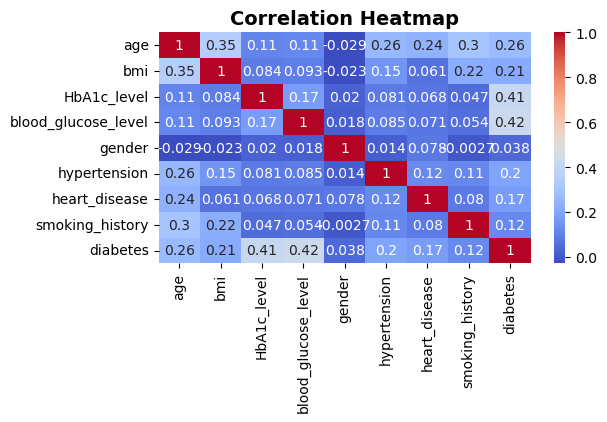

In [16]:
#Correlation heatmap

plt.figure(figsize = (6,3))
columns = ['age', 'bmi', 'HbA1c_level','blood_glucose_level', 'gender','hypertension','heart_disease','smoking_history','diabetes']
sns.heatmap(diabetes_data[columns].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap", fontsize = '14', fontweight= 'bold')
plt.show()

In [17]:
#Count values of target variable. This is done to identify whether the data is balance or not
value_counts = diabetes_data['diabetes'].value_counts()
print(value_counts)

0    87664
1     8482
Name: diabetes, dtype: int64


In [18]:
diabetes_data = diabetes_data.drop(['gender'], axis=1)
diabetes_data

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,0,25.19,6.6,140,0
1,54,0,0,-1,27.32,6.6,80,0
2,28,0,0,0,27.32,5.7,158,0
3,36,0,0,1,23.45,5.0,155,0
4,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99994,36,0,0,-1,24.60,4.8,145,0
99996,2,0,0,-1,17.37,6.5,100,0
99997,66,0,0,1,27.83,5.7,155,0
99998,24,0,0,0,35.42,4.0,100,0


In [19]:
#Data Modeling

In [20]:
#Split the dataset into testing and training
X = diabetes_data.iloc[:,0:7]
Y = diabetes_data.iloc[:,-1]
X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,80,0,1,0,25.19,6.6,140
1,54,0,0,-1,27.32,6.6,80
2,28,0,0,0,27.32,5.7,158
3,36,0,0,1,23.45,5.0,155
4,76,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...
99994,36,0,0,-1,24.60,4.8,145
99996,2,0,0,-1,17.37,6.5,100
99997,66,0,0,1,27.83,5.7,155
99998,24,0,0,0,35.42,4.0,100


In [21]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [23]:
#Since data set is imbalance, we have to use SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [24]:
# Combine the resampled features and target into a new DataFrame
data_resampled = pd.concat([pd.DataFrame(X_train_smote, columns=X.columns), pd.Series(y_train_smote, name='diabetes')], axis=1)

In [25]:
import time

In [26]:
#Create the model
from sklearn.ensemble import RandomForestClassifier

t0 = time.time()
rfc_smote = RandomForestClassifier()
rfc_smote.fit(X_train_smote, y_train_smote)

t1 = time.time()

print('Time to create the model:',t1-t0)

Time to create the model: 11.116172313690186


In [27]:
print(X_train_smote)

        age  hypertension  heart_disease  smoking_history        bmi  \
0        35             0              0               -1  31.530000   
1         0             0              0               -1  15.190000   
2        60             0              0                1  20.900000   
3        66             0              0                0  27.050000   
4        48             0              0                0  24.050000   
...     ...           ...            ...              ...        ...   
140305   59             0              0                0  31.502713   
140306   46             0              0                0  25.882182   
140307   73             0              0                0  33.410200   
140308   43             0              0                0  31.882221   
140309   46             0              0                0  26.643425   

        HbA1c_level  blood_glucose_level  
0          6.600000                  155  
1          4.000000                  130  
2     

In [28]:
y_pred_rfc_smote = rfc_smote.predict(X_test)

In [29]:
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix

print("Accuracy Score: ", accuracy_score(y_test, y_pred_rfc_smote) * 100)
print("\n\nMean Squared Error: ", mean_squared_error(y_test, y_pred_rfc_smote))
print("\n\nF1 Score: ", f1_score(y_test, y_pred_rfc_smote))
print("\n\nClassification Report\n", classification_report(y_test, y_pred_rfc_smote))
print("\n\nConfusion Matrix\n", confusion_matrix(y_test, y_pred_rfc_smote))

Accuracy Score:  95.44461778471138


Mean Squared Error:  0.045553822152886114


F1 Score:  0.7440093512565751


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     17509
           1       0.75      0.74      0.74      1721

    accuracy                           0.95     19230
   macro avg       0.86      0.86      0.86     19230
weighted avg       0.95      0.95      0.95     19230



Confusion Matrix
 [[17081   428]
 [  448  1273]]


In [30]:
# Get the feature importances
feature_importances = rfc_smote.feature_importances_
# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)


               Feature  Importance
5          HbA1c_level    0.422578
6  blood_glucose_level    0.255769
0                  age    0.164302
4                  bmi    0.103289
3      smoking_history    0.048796
1         hypertension    0.003171
2        heart_disease    0.002097


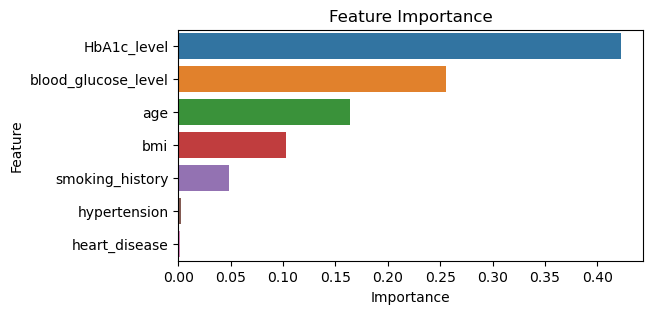

In [31]:
import seaborn as sns

# Plot the feature importances 
plt.figure(figsize=(6,3))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()